<a href="https://colab.research.google.com/github/JoArthur8/Aulas_Pa2024/blob/main/Pr%C3%A1ticaSuperstore_Sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Superstore Dataset (Vendas globais de uma loja): https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/JoArthur8/Aulas_Pa2024/refs/heads/main/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Context
Retail dataset of a global superstore for 4 years.
Perform EDA and Predict the sales of the next 7 days from the last date of the Training dataset!


In [ ]:
df.isnull().sum()

# Temos valores nulos em código postal, porém é um valor string e de baixa importância, então podemos ignorá-lo

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
cols = ['Country','Ship Mode','Segment','City','State','Region','Category','Sub-Category','Product Name','Sales']
reduz = df[cols]

# Reduzindo nosso dataframe por simplicidade

#Colunas Removidas: Row ID, Order ID, Order Date, Ship Date, Customer ID, Customer Name, Postal Code, Product ID

In [9]:
reduz.head()

,Country,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,United States,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,United States,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,United States,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,United States,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,United States,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


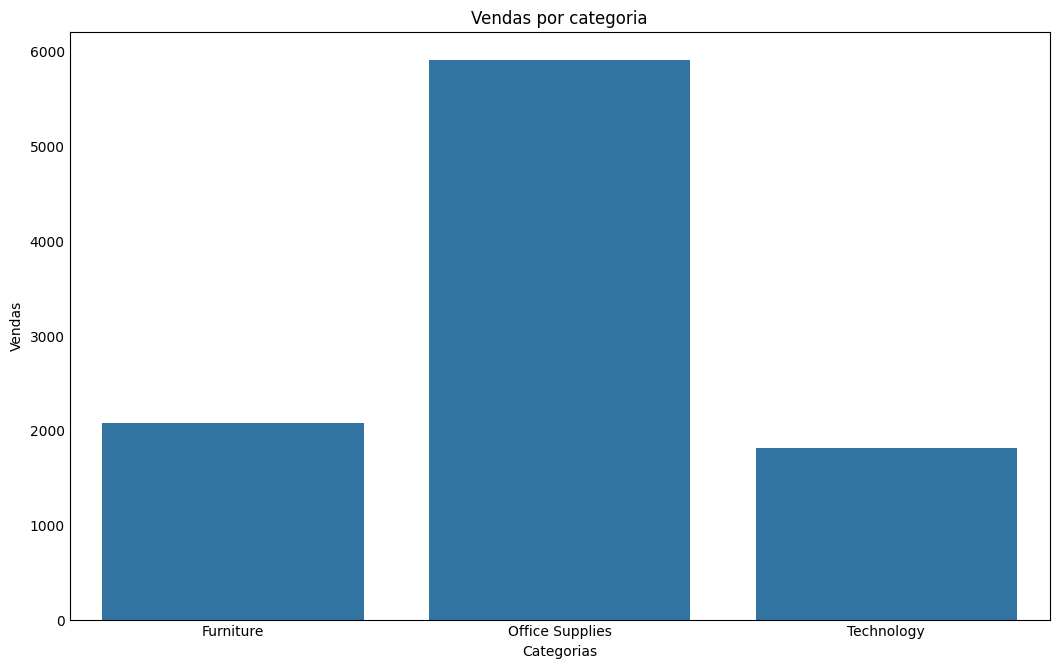

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=reduz)
plt.title('Vendas por categoria')
plt.xlabel('Categorias')
plt.ylabel('Vendas')
plt.show()

# Vemos aqui que a categoria com maior quantidade de vendas são os produtos de escritório

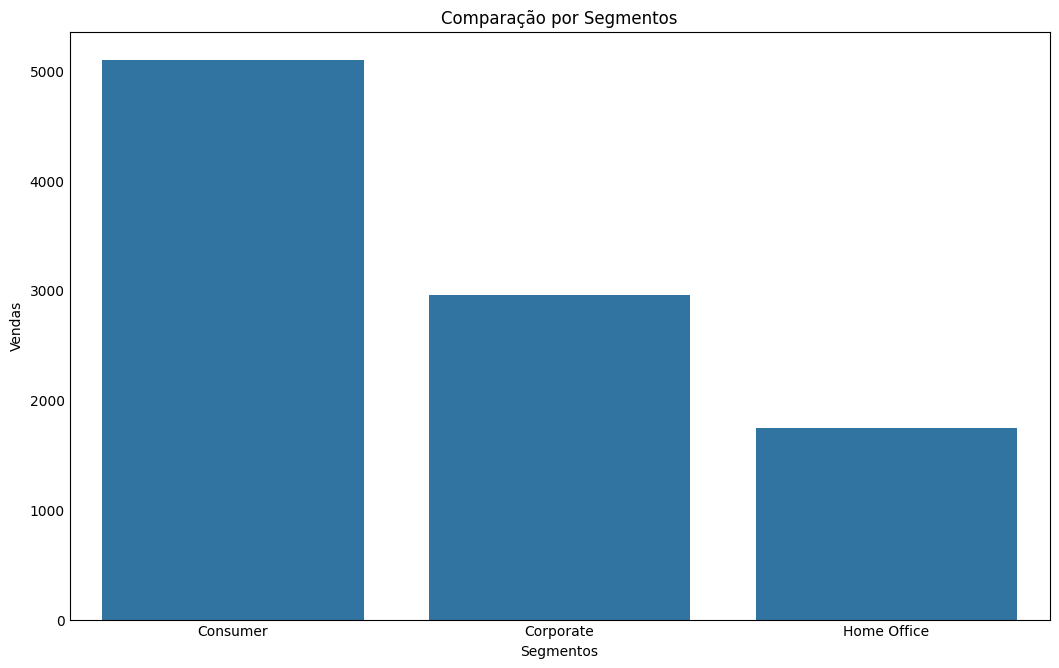

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Segment', data=reduz)
plt.title('Comparação por Segmentos')
plt.xlabel('Segmentos')
plt.ylabel('Vendas')
plt.show()

# Aqui vemos que a maioria dos compradores são pessoas comuns

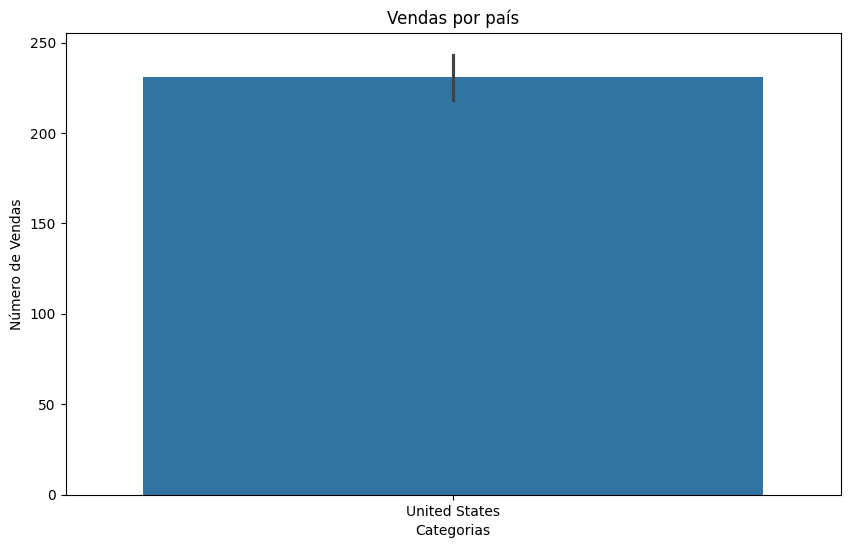

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Sales', data=reduz)
plt.title('Vendas por país')
plt.xlabel('Países')
plt.ylabel('Vendas')
plt.show()

# A base de dados foi dita como global, porém na realidade só possui dados referentes aos Estdos Unidos

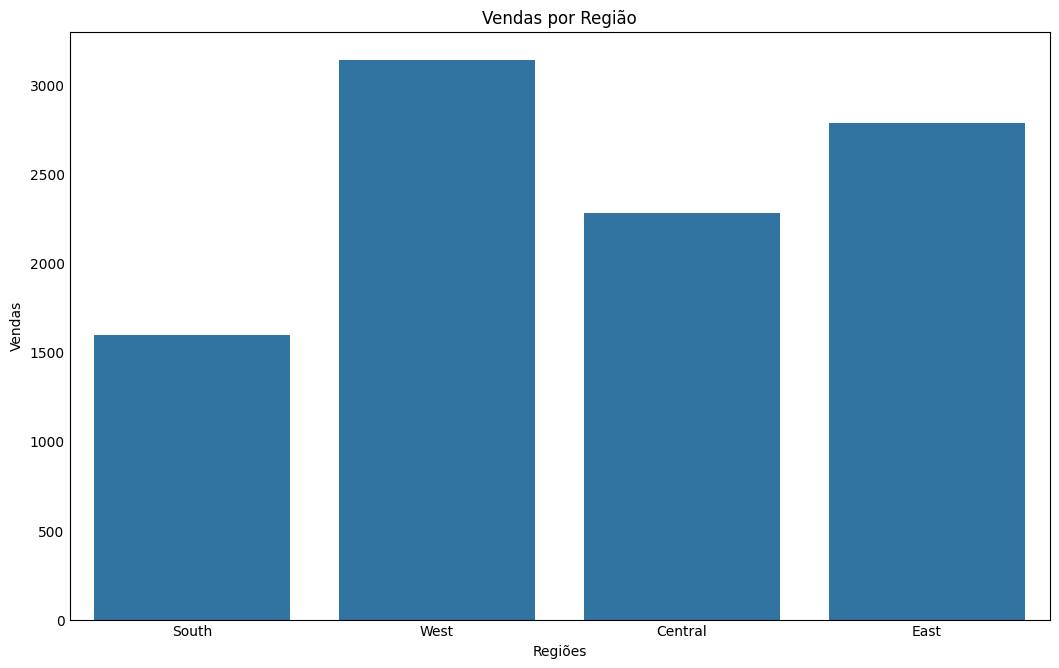

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='Region', data=reduz)
plt.title('Vendas por Região')
plt.xlabel('Regiões')
plt.ylabel('Vendas')
plt.show()

# Aqui vemos quais regiões dos Estados Unidos mais compram

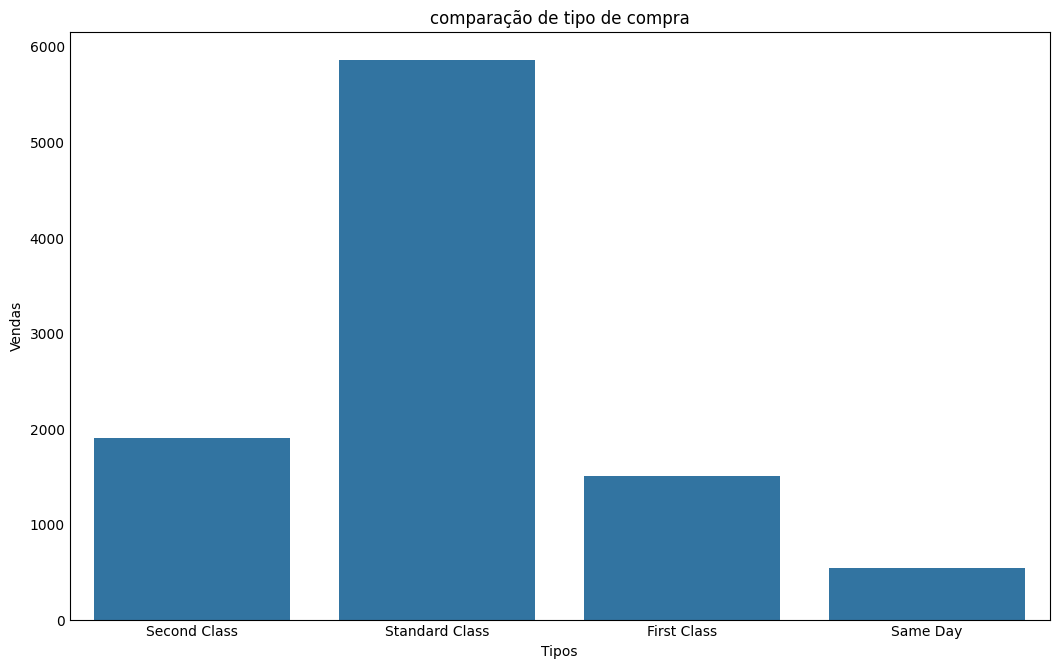

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Ship Mode', data=reduz)
plt.title('comparação de tipo de compra')
plt.xlabel('Tipos')
plt.ylabel('Vendas')
plt.show()

# Aqui podemos ver que a maior parte são compras comuns

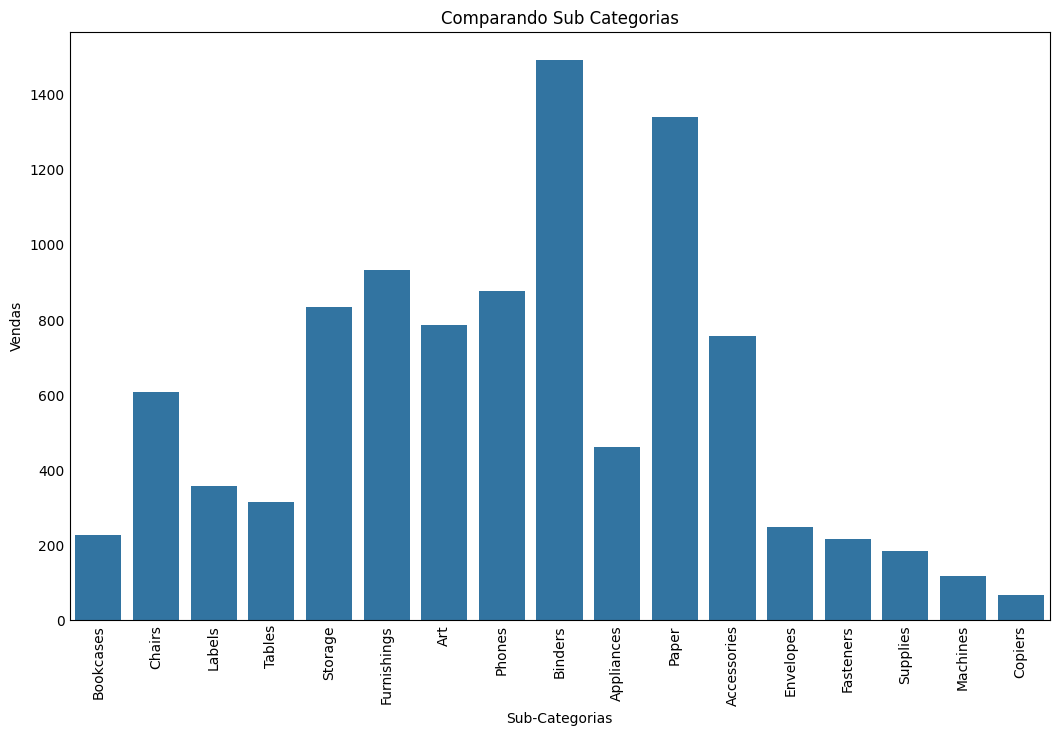

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sub-Category', data=reduz)
plt.xlabel('Sub-Categorias')
plt.ylabel('Vendas')
plt.title('Comparando Sub Categorias')
plt.xticks(rotation='vertical')
plt.show()

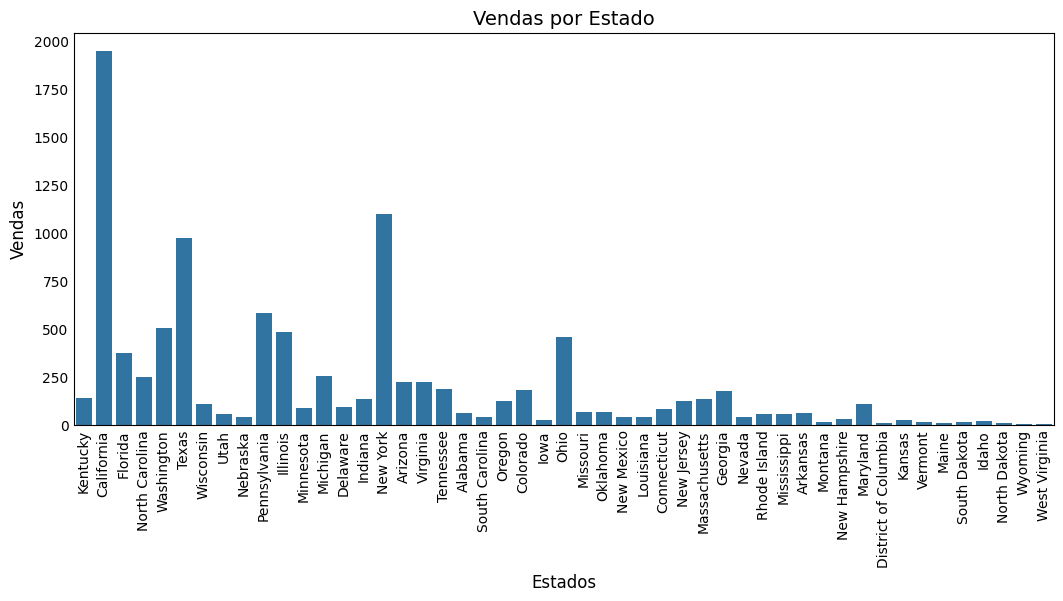

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(x='State', data=reduz)
plt.xlabel('Estados',fontsize=12)
plt.ylabel('Vendas',fontsize=12)
plt.title('Vendas por Estado',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

# Podemos ver que aqueles que mais fazem compras são a California, Nova Iorque e Texas

# Observações

O objetivo original dessa base de dados está listado como prever as vendas para os próximos dias com base nos dados, porém nossa turma ainda não sabe como usar Machine Learning, portanto eu fiz tudo que consegui pensar e cheguei nessas informações:


*   Essa base de dados tem os Estados Unidos como foco
*   A maioria das vendas foi feita no Leste, seguida pelo Oeste, Centro e Sul
*   A maior parte das compras foram feitas por clientes comuns
*   Os itens mais comprados foram materiais de escritório
*   A maior parte das compras foram feitas através da classe econômica
*   O Estado que mais fez compras foi a California


Espero que esteja satisfatório por enquanto